In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split 

In [ ]:
df = pd.read_csv('College_Data.csv')

In [ ]:
df

In [ ]:
df.describe()

In [13]:
#Create data
data = make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.8,random_state=2021)

X = data[0]
y = data[1]

print('X:',X[0:5,:])
print('y:',y[0:5])

X: [[12.11829634 -2.63233068]
 [-8.24691951 -3.30208655]
 [-9.76830336 -0.29449797]
 [-5.10872315 -8.07259074]
 [12.29458108 -4.41061554]]
y: [2 1 1 1 2]


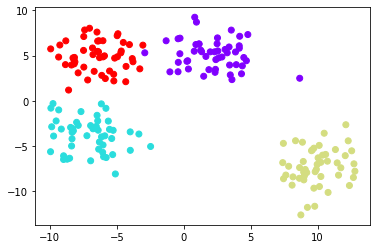

In [14]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=2021)
kmeans.fit(X) 

KMeans(n_clusters=4, random_state=2021)

In [24]:
kmeans.cluster_centers_

array([[ 2.2456003 ,  5.14394594],
       [-6.35570017,  4.93415429],
       [ 9.95072537, -7.290292  ],
       [-7.06363189, -3.77124514]])

In [25]:
kmeans.labels_

array([2, 3, 3, 3, 2, 2, 0, 3, 1, 2, 2, 3, 0, 1, 1, 2, 3, 2, 1, 3, 2, 1,
       0, 3, 3, 2, 1, 0, 3, 2, 1, 1, 1, 2, 3, 2, 0, 2, 1, 0, 0, 2, 1, 2,
       3, 1, 2, 3, 3, 3, 0, 0, 0, 1, 3, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1,
       0, 0, 1, 2, 3, 3, 1, 2, 1, 3, 1, 1, 0, 3, 2, 0, 2, 1, 1, 2, 1, 0,
       0, 3, 1, 1, 3, 2, 3, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 3, 3,
       0, 1, 3, 3, 0, 3, 0, 0, 2, 1, 0, 3, 0, 0, 1, 1, 2, 2, 0, 3, 2, 1,
       1, 3, 1, 2, 1, 1, 1, 2, 3, 0, 3, 2, 1, 2, 0, 1, 2, 1, 3, 2, 3, 2,
       1, 0, 0, 0, 2, 0, 1, 3, 1, 1, 2, 0, 2, 3, 2, 1, 0, 3, 2, 2, 0, 1,
       3, 3, 2, 2, 3, 1, 2, 3, 3, 3, 0, 3, 2, 0, 3, 0, 3, 0, 0, 3, 1, 3,
       0, 3])

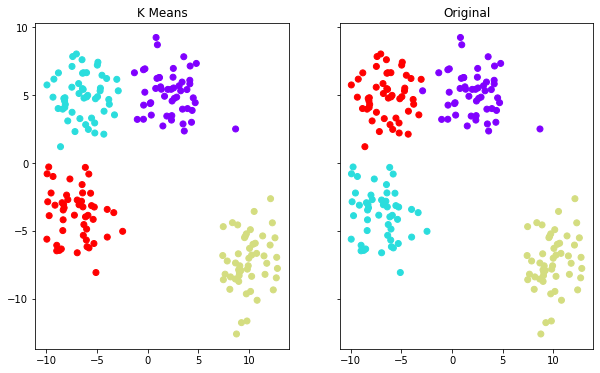

In [26]:
f, (ax1, ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')



In [31]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np 


y_pred = kmeans.predict(X)
y_pred

array([2, 3, 3, 3, 2, 2, 0, 3, 1, 2, 2, 3, 0, 1, 1, 2, 3, 2, 1, 3, 2, 1,
       0, 3, 3, 2, 1, 0, 3, 2, 1, 1, 1, 2, 3, 2, 0, 2, 1, 0, 0, 2, 1, 2,
       3, 1, 2, 3, 3, 3, 0, 0, 0, 1, 3, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1,
       0, 0, 1, 2, 3, 3, 1, 2, 1, 3, 1, 1, 0, 3, 2, 0, 2, 1, 1, 2, 1, 0,
       0, 3, 1, 1, 3, 2, 3, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 3, 3,
       0, 1, 3, 3, 0, 3, 0, 0, 2, 1, 0, 3, 0, 0, 1, 1, 2, 2, 0, 3, 2, 1,
       1, 3, 1, 2, 1, 1, 1, 2, 3, 0, 3, 2, 1, 2, 0, 1, 2, 1, 3, 2, 3, 2,
       1, 0, 0, 0, 2, 0, 1, 3, 1, 1, 2, 0, 2, 3, 2, 1, 0, 3, 2, 2, 0, 1,
       3, 3, 2, 2, 3, 1, 2, 3, 3, 3, 0, 3, 2, 0, 3, 0, 3, 0, 0, 3, 1, 3,
       0, 3])

In [34]:
y_pred = np.where(y_pred==3,10,y_pred)
y_pred = np.where(y_pred==1,3,y_pred)
y_pred = np.where(y_pred==10,1,y_pred)
y_pred

array([2, 3, 3, 3, 2, 2, 0, 3, 1, 2, 2, 3, 0, 1, 1, 2, 3, 2, 1, 3, 2, 1,
       0, 3, 3, 2, 1, 0, 3, 2, 1, 1, 1, 2, 3, 2, 0, 2, 1, 0, 0, 2, 1, 2,
       3, 1, 2, 3, 3, 3, 0, 0, 0, 1, 3, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1,
       0, 0, 1, 2, 3, 3, 1, 2, 1, 3, 1, 1, 0, 3, 2, 0, 2, 1, 1, 2, 1, 0,
       0, 3, 1, 1, 3, 2, 3, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 3, 3,
       0, 1, 3, 3, 0, 3, 0, 0, 2, 1, 0, 3, 0, 0, 1, 1, 2, 2, 0, 3, 2, 1,
       1, 3, 1, 2, 1, 1, 1, 2, 3, 0, 3, 2, 1, 2, 0, 1, 2, 1, 3, 2, 3, 2,
       1, 0, 0, 0, 2, 0, 1, 3, 1, 1, 2, 0, 2, 3, 2, 1, 0, 3, 2, 2, 0, 1,
       3, 3, 2, 2, 3, 1, 2, 3, 3, 3, 0, 3, 2, 0, 3, 0, 3, 0, 0, 3, 1, 3,
       0, 3])

In [35]:
print(confusion_matrix(y,y_pred))

[[49  1  0  0]
 [ 0  0  0 50]
 [ 0  0 50  0]
 [ 0 50  0  0]]


In [37]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.00      0.00      0.00        50
           2       1.00      1.00      1.00        50
           3       0.00      0.00      0.00        50

    accuracy                           0.49       200
   macro avg       0.50      0.49      0.50       200
weighted avg       0.50      0.49      0.50       200



In [46]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=4,random_state=2021)
kmedoids.fit(X)

KMedoids(n_clusters=4, random_state=2021)

In [47]:
kmedoids.cluster_centers_

array([[ 2.31111031,  5.42726592],
       [ 9.97482094, -7.01855043],
       [-7.23473332, -3.84607675],
       [-6.29114639,  4.78111621]])

In [49]:
kmedoids.labels_

array([1, 2, 2, 2, 1, 1, 0, 2, 3, 1, 1, 2, 0, 3, 3, 1, 2, 1, 3, 2, 1, 3,
       0, 2, 2, 1, 3, 0, 2, 1, 3, 3, 3, 1, 2, 1, 0, 1, 3, 0, 0, 1, 3, 1,
       2, 3, 1, 2, 2, 2, 0, 0, 0, 3, 2, 3, 3, 0, 3, 3, 1, 3, 0, 1, 0, 3,
       0, 0, 3, 1, 2, 2, 3, 1, 3, 2, 3, 3, 0, 2, 1, 0, 1, 3, 3, 1, 3, 0,
       0, 2, 3, 3, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 3, 1, 2, 2,
       0, 3, 2, 2, 0, 2, 0, 0, 1, 3, 0, 2, 0, 0, 3, 3, 1, 1, 0, 2, 1, 3,
       3, 2, 3, 1, 3, 3, 3, 1, 2, 0, 2, 1, 3, 1, 0, 3, 1, 3, 2, 1, 2, 1,
       3, 0, 0, 0, 1, 0, 3, 2, 3, 3, 1, 0, 1, 2, 1, 3, 0, 2, 1, 1, 0, 3,
       2, 2, 1, 1, 2, 3, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 3, 2,
       0, 2], dtype=int64)

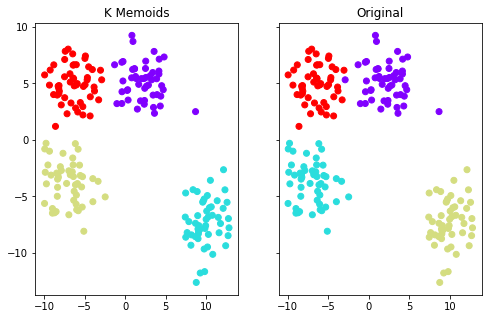

In [53]:
f, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(8,5))
ax1.set_title('K Memoids')
ax1.scatter(X[:,0],X[:,1],c=kmedoids.labels_,cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')

In [54]:
y_pred = kmedoids.predict(X)
y_pred

array([1, 2, 2, 2, 1, 1, 0, 2, 3, 1, 1, 2, 0, 3, 3, 1, 2, 1, 3, 2, 1, 3,
       0, 2, 2, 1, 3, 0, 2, 1, 3, 3, 3, 1, 2, 1, 0, 1, 3, 0, 0, 1, 3, 1,
       2, 3, 1, 2, 2, 2, 0, 0, 0, 3, 2, 3, 3, 0, 3, 3, 1, 3, 0, 1, 0, 3,
       0, 0, 3, 1, 2, 2, 3, 1, 3, 2, 3, 3, 0, 2, 1, 0, 1, 3, 3, 1, 3, 0,
       0, 2, 3, 3, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 3, 1, 2, 2,
       0, 3, 2, 2, 0, 2, 0, 0, 1, 3, 0, 2, 0, 0, 3, 3, 1, 1, 0, 2, 1, 3,
       3, 2, 3, 1, 3, 3, 3, 1, 2, 0, 2, 1, 3, 1, 0, 3, 1, 3, 2, 1, 2, 1,
       3, 0, 0, 0, 1, 0, 3, 2, 3, 3, 1, 0, 1, 2, 1, 3, 0, 2, 1, 1, 0, 3,
       2, 2, 1, 1, 2, 3, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 3, 2,
       0, 2], dtype=int64)

In [55]:
y_pred = np.where(y_pred==1,10,y_pred)
y_pred = np.where(y_pred==2,1,y_pred)
y_pred = np.where(y_pred==10,2,y_pred)
y_pred

array([2, 1, 1, 1, 2, 2, 0, 1, 3, 2, 2, 1, 0, 3, 3, 2, 1, 2, 3, 1, 2, 3,
       0, 1, 1, 2, 3, 0, 1, 2, 3, 3, 3, 2, 1, 2, 0, 2, 3, 0, 0, 2, 3, 2,
       1, 3, 2, 1, 1, 1, 0, 0, 0, 3, 1, 3, 3, 0, 3, 3, 2, 3, 0, 2, 0, 3,
       0, 0, 3, 2, 1, 1, 3, 2, 3, 1, 3, 3, 0, 1, 2, 0, 2, 3, 3, 2, 3, 0,
       0, 1, 3, 3, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 3, 2, 1, 1,
       0, 3, 1, 1, 0, 1, 0, 0, 2, 3, 0, 1, 0, 0, 3, 3, 2, 2, 0, 1, 2, 3,
       3, 1, 3, 2, 3, 3, 3, 2, 1, 0, 1, 2, 3, 2, 0, 3, 2, 3, 1, 2, 1, 2,
       3, 0, 0, 0, 2, 0, 3, 1, 3, 3, 2, 0, 2, 1, 2, 3, 0, 1, 2, 2, 0, 3,
       1, 1, 2, 2, 1, 3, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 3, 1,
       0, 1], dtype=int64)

In [56]:
print(confusion_matrix(y,y_pred))

[[49  0  0  1]
 [ 0 50  0  0]
 [ 0  0 50  0]
 [ 0  0  0 50]]


In [57]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       0.98      1.00      0.99        50

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

